# Canada Open Data #

## Набор данных ##

url: http://www.data.gc.ca/

Набор данных: [Annual Projections of New Immigrants Seeking Jobs by Occupation](http://www.edsc-esdc.gc.ca/ouvert-open/labour-travail/immigration_2015_2024.csv) 
(Ежегодные прогнозы новых иммигрантов, ищущих работу по профессии)

Данные уже загружены и находятся в ./data/immigration_2015_2024.csv

Загрузим данные и посмотрим некоторые из них. Данные в кодировке cp1250.

## Структура данных ##

* Code - COPS код группы профессий
* Occupation_Name - английское название
* Nom_de_la_profession - французское название
* 2014-2024 - прогноз по годам

## "Познакомимся" с данными ##

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
data = pd.read_csv('./data/immigration_2015_2024.csv', index_col=1, encoding='cp1250')
del data['Code']
del data['Nom_de_la_profession']

Посмотрим первые записи

In [82]:
data.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
All Occupations,120400,116600,118200,119700,121300,122900,124500,126000,127600,128900,130300
Management Occupations,9200,8900,8900,9000,9000,9100,9100,9200,9300,9300,9400
Occupations usually require university education.,24100,23300,23500,23800,24100,24400,24700,25000,25300,25500,25800
Occupations usually require college or vocational education or apprenticeship training.,32800,31900,32500,33000,33600,34100,34700,35200,35700,36200,36700
Occupations usually require secondary school and/or occupation-specific training.,35800,34500,34900,35300,35700,36100,36500,36900,37300,37600,37900


Посмотрим последнии записи

In [83]:
data.tail()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Labourers in mineral and metal processing & Labourers in metal fabrication,100,100,100,100,100,100,100,100,100,100,100
Labourers in chemical products processing and utilities & Labourers in rubber and plastic products manufacturing,200,100,100,100,100,100,100,100,100,100,100
"Labourers in wood, pulp and paper processing",0,0,0,0,0,0,0,0,0,0,0
"Labourers in textile processing & Other labourers in processing, manufacturing and utilities",1100,1100,1000,1000,1000,1000,1000,1000,1000,1000,1000
"Labourers in food, beverage and related products processing & Labourers in fish and seafood processing",1100,1000,1000,1000,1000,1000,1000,1000,1000,1000,900


Размерность данных

In [84]:
data.shape

(308, 11)

## Проверим есть ли отсутствующие значения в данных ##

Проверим на NaN

In [85]:
data.isnull().any()

2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool

Проверим есть ли строки, содержащие только нули

In [86]:
zero_rows = data[(data == 0).all(axis=1)]
zero_rows.shape[0]

20

20 пустых строк, удалим их из набора данных

In [87]:
data = data[(data != 0).any(axis=1)]

Посмотрим как в целом по всем профессиям меняется количество иммигрантов ищущих работу.

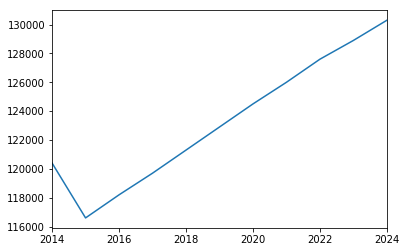

In [88]:
data.iloc[0].plot()

In [91]:
data.iloc[1:].describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,1262.717770,1223.344948,1237.979094,1254.006969,1269.686411,1291.289199,1306.620209,1319.512195,1336.585366,1351.567944,1361.672474
std,4391.564976,4259.203769,4320.853657,4382.511690,4446.152683,4510.410732,4573.394258,4636.949025,4696.593712,4752.193750,4804.855643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
75%,550.000000,500.000000,500.000000,500.000000,500.000000,550.000000,550.000000,550.000000,550.000000,550.000000,600.000000
max,37100.000000,36200.000000,36900.000000,37500.000000,38200.000000,38900.000000,39500.000000,40200.000000,40800.000000,41400.000000,41900.000000


In [92]:
data.T.describe()

Occupation_Name,All Occupations,Management Occupations,Occupations usually require university education.,Occupations usually require college or vocational education or apprenticeship training.,Occupations usually require secondary school and/or occupation-specific training.,On-the-job training is usually provided for occupations.,Legislators and senior management,"Business, finance and administration occupations",Natural and applied sciences and related occupations,Health occupations,...,Printing equipment operators and related occupations,"Aircraft assemblers and aircraft assembly inspectors; Motor vehicle assemblers, inspectors and testers & Mechanical assemblers and inspectors","Electronics assemblers, fabricators, inspectors and testers","Assemblers and inspectors, electrical appliance, apparatus and equipment manufacturing & Assemblers, fabricators and inspectors, industrial electrical motors and transformers","Boat assemblers and inspectors; Plastic products assemblers, finishers and inspectors; Industrial painters, coaters and metal finishing process operators& Other products assemblers, finishers and inspectors",Furniture and fixture assemblers and inspectors; Other wood products assemblers and inspectors & Furniture finishers and refinishers,Labourers in mineral and metal processing & Labourers in metal fabrication,Labourers in chemical products processing and utilities & Labourers in rubber and plastic products manufacturing,"Labourers in textile processing & Other labourers in processing, manufacturing and utilities","Labourers in food, beverage and related products processing & Labourers in fish and seafood processing"
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.0,11.000000,11.000000,11.00000
mean,123309.090909,9127.272727,24500.000000,34218.181818,36227.272727,19236.363636,500.0,18736.363636,13681.818182,9545.454545,...,190.909091,454.545455,263.636364,172.727273,427.272727,400.00000,100.0,109.090909,1018.181818,1000.00000
std,4516.736553,167.874412,829.457654,1603.008535,1115.428984,832.193159,100.0,724.255103,256.195948,704.788814,...,30.151134,52.223297,50.452498,46.709937,46.709937,44.72136,0.0,30.151134,40.451992,44.72136
min,116600.000000,8900.000000,23300.000000,31900.000000,34500.000000,18000.000000,400.0,17700.000000,13300.000000,8600.000000,...,100.000000,400.000000,200.000000,100.000000,400.000000,300.00000,100.0,100.000000,1000.000000,900.00000
25%,120050.000000,9000.000000,23950.000000,32900.000000,35500.000000,18600.000000,400.0,18200.000000,13450.000000,8950.000000,...,200.000000,400.000000,200.000000,150.000000,400.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
50%,122900.000000,9100.000000,24400.000000,34100.000000,36100.000000,19200.000000,500.0,18700.000000,13700.000000,9500.000000,...,200.000000,500.000000,300.000000,200.000000,400.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
75%,126800.000000,9250.000000,25150.000000,35450.000000,37100.000000,19850.000000,550.0,19300.000000,13900.000000,10100.000000,...,200.000000,500.000000,300.000000,200.000000,450.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
max,130300.000000,9400.000000,25800.000000,36700.000000,37900.000000,20500.000000,700.0,19900.000000,14000.000000,10600.000000,...,200.000000,500.000000,300.000000,200.000000,500.000000,500.00000,100.0,200.000000,1100.000000,1100.00000


Найдем группу профессий с мин/макс количеством иммигрантов за текущий 2017 год

In [71]:
year = '2017'

In [72]:
ix_min = data[year].iloc[1:].idxmin()
ix_min

u'Managers in public protection services'

In [73]:
data[year][ix_min]

0

Не удивительно, что ноль. К группе "Managers in public protection services" относятся такие подгруппы профессий как:
    
    * Commissioned police officers
    * Fire chiefs and senior firefighting officers
    * Commissioned officers of the Canadian Forces
    
Т.е. то, что связано с безопасностью. Иммигрантов, как правило не берут на такие профессии. Давайте, посмотрим,
а вообще по всем годам есть положительные прогнозы для данной группы?

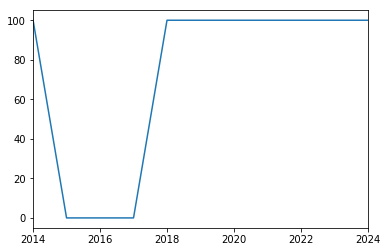

In [74]:
data.loc[ix_min].plot()

В 2014 году были и по прогнозам в будущем будут.

In [75]:
ix_max = data['2017'].iloc[1:].idxmax()
ix_max

u'Sales and service occupations'

In [76]:
data[year][ix_max]

37500

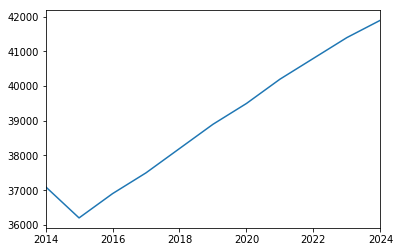

In [77]:
data.loc[ix_max].plot()

Попробуем найти все группы профессий, связанных с информационными технологиями.

In [78]:
ixs_comp = ['computer' in el.lower() for el in data.index]
data = data[ixs_comp]

In [79]:
data

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Computer and information systems managers,500,500,500,500,500,500,500,500,500,500,600
Computer engineers (except software engineers and designers),500,500,500,500,500,500,500,500,500,500,500
Computer programmers and interactive media developers,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
Computer network technician,700,600,600,600,600,700,700,700,700,700,700


Какие-то "скучные" прогнозы.